In [31]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import fashion_mnist as fashion
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=fashion.load_data()
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
x_train,x_test=x_train/255.0,x_test/255.0



In [32]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.7487 - loss: 0.6967
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.8775 - loss: 0.3385
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.8959 - loss: 0.2848
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9061 - loss: 0.2558
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9198 - loss: 0.2225


In [40]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy:{test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8995 - loss: 0.2751
Test accuracy:0.9039000272750854


In [42]:
y_classes=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag","Ankle boot"]

In [43]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


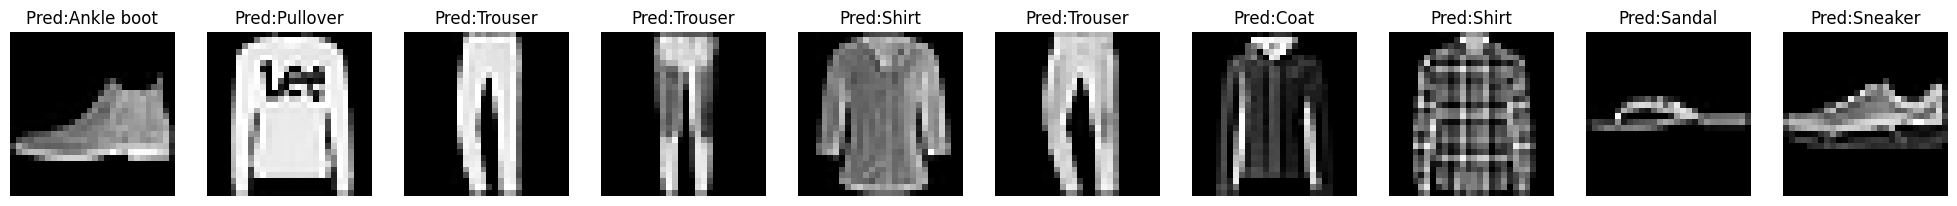

In [45]:
fig,ax=plt.subplots(1,10,figsize=(25,5))
for i in range(10):
    ax[i].imshow(x_test[i].reshape(28,28),cmap='gray')
    ax[i].set_title(f"Pred:{y_classes[predictions[i].argmax()]}")
    ax[i].axis('off')
plt.show()